https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

# Bike Sharing Dataset -Regression
    

Goal: Regression: 
    Predication of bike rental count hourly or daily based on the environmental and seasonal settings.
    Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

In [158]:
#Importing essential libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # used for feature scaling
from sklearn.preprocessing import MinMaxScaler
#plotting libraries
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns
# Plotting parameters tuning
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

#import statsmodels.api as sm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
%matplotlib inline

from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.utils.testing import  ignore_warnings

from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
%matplotlib inline


from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
%config InlineBackend.figure_format = 'retina'
import os


Exploratory Data Analysis

In [159]:
#Reading data from csv files
df=pd.read_csv("hour.csv")


In [160]:
df.shape #Information of data

(17379, 17)

In [161]:
df.info() #Number of non-null values in different feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          16982 non-null float64
atemp         16819 non-null float64
hum           16879 non-null float64
windspeed     17373 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.2+ MB


In [162]:
df.dtypes # Gives the different features in the data with thier data types

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [163]:
df.head(10) #reading data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,NaN,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,NaN,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,NaN,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,NaN,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,NaN,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,NaN,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,NaN,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,NaN,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,NaN,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,NaN,0.3485,0.76,0.0000,8,6,14


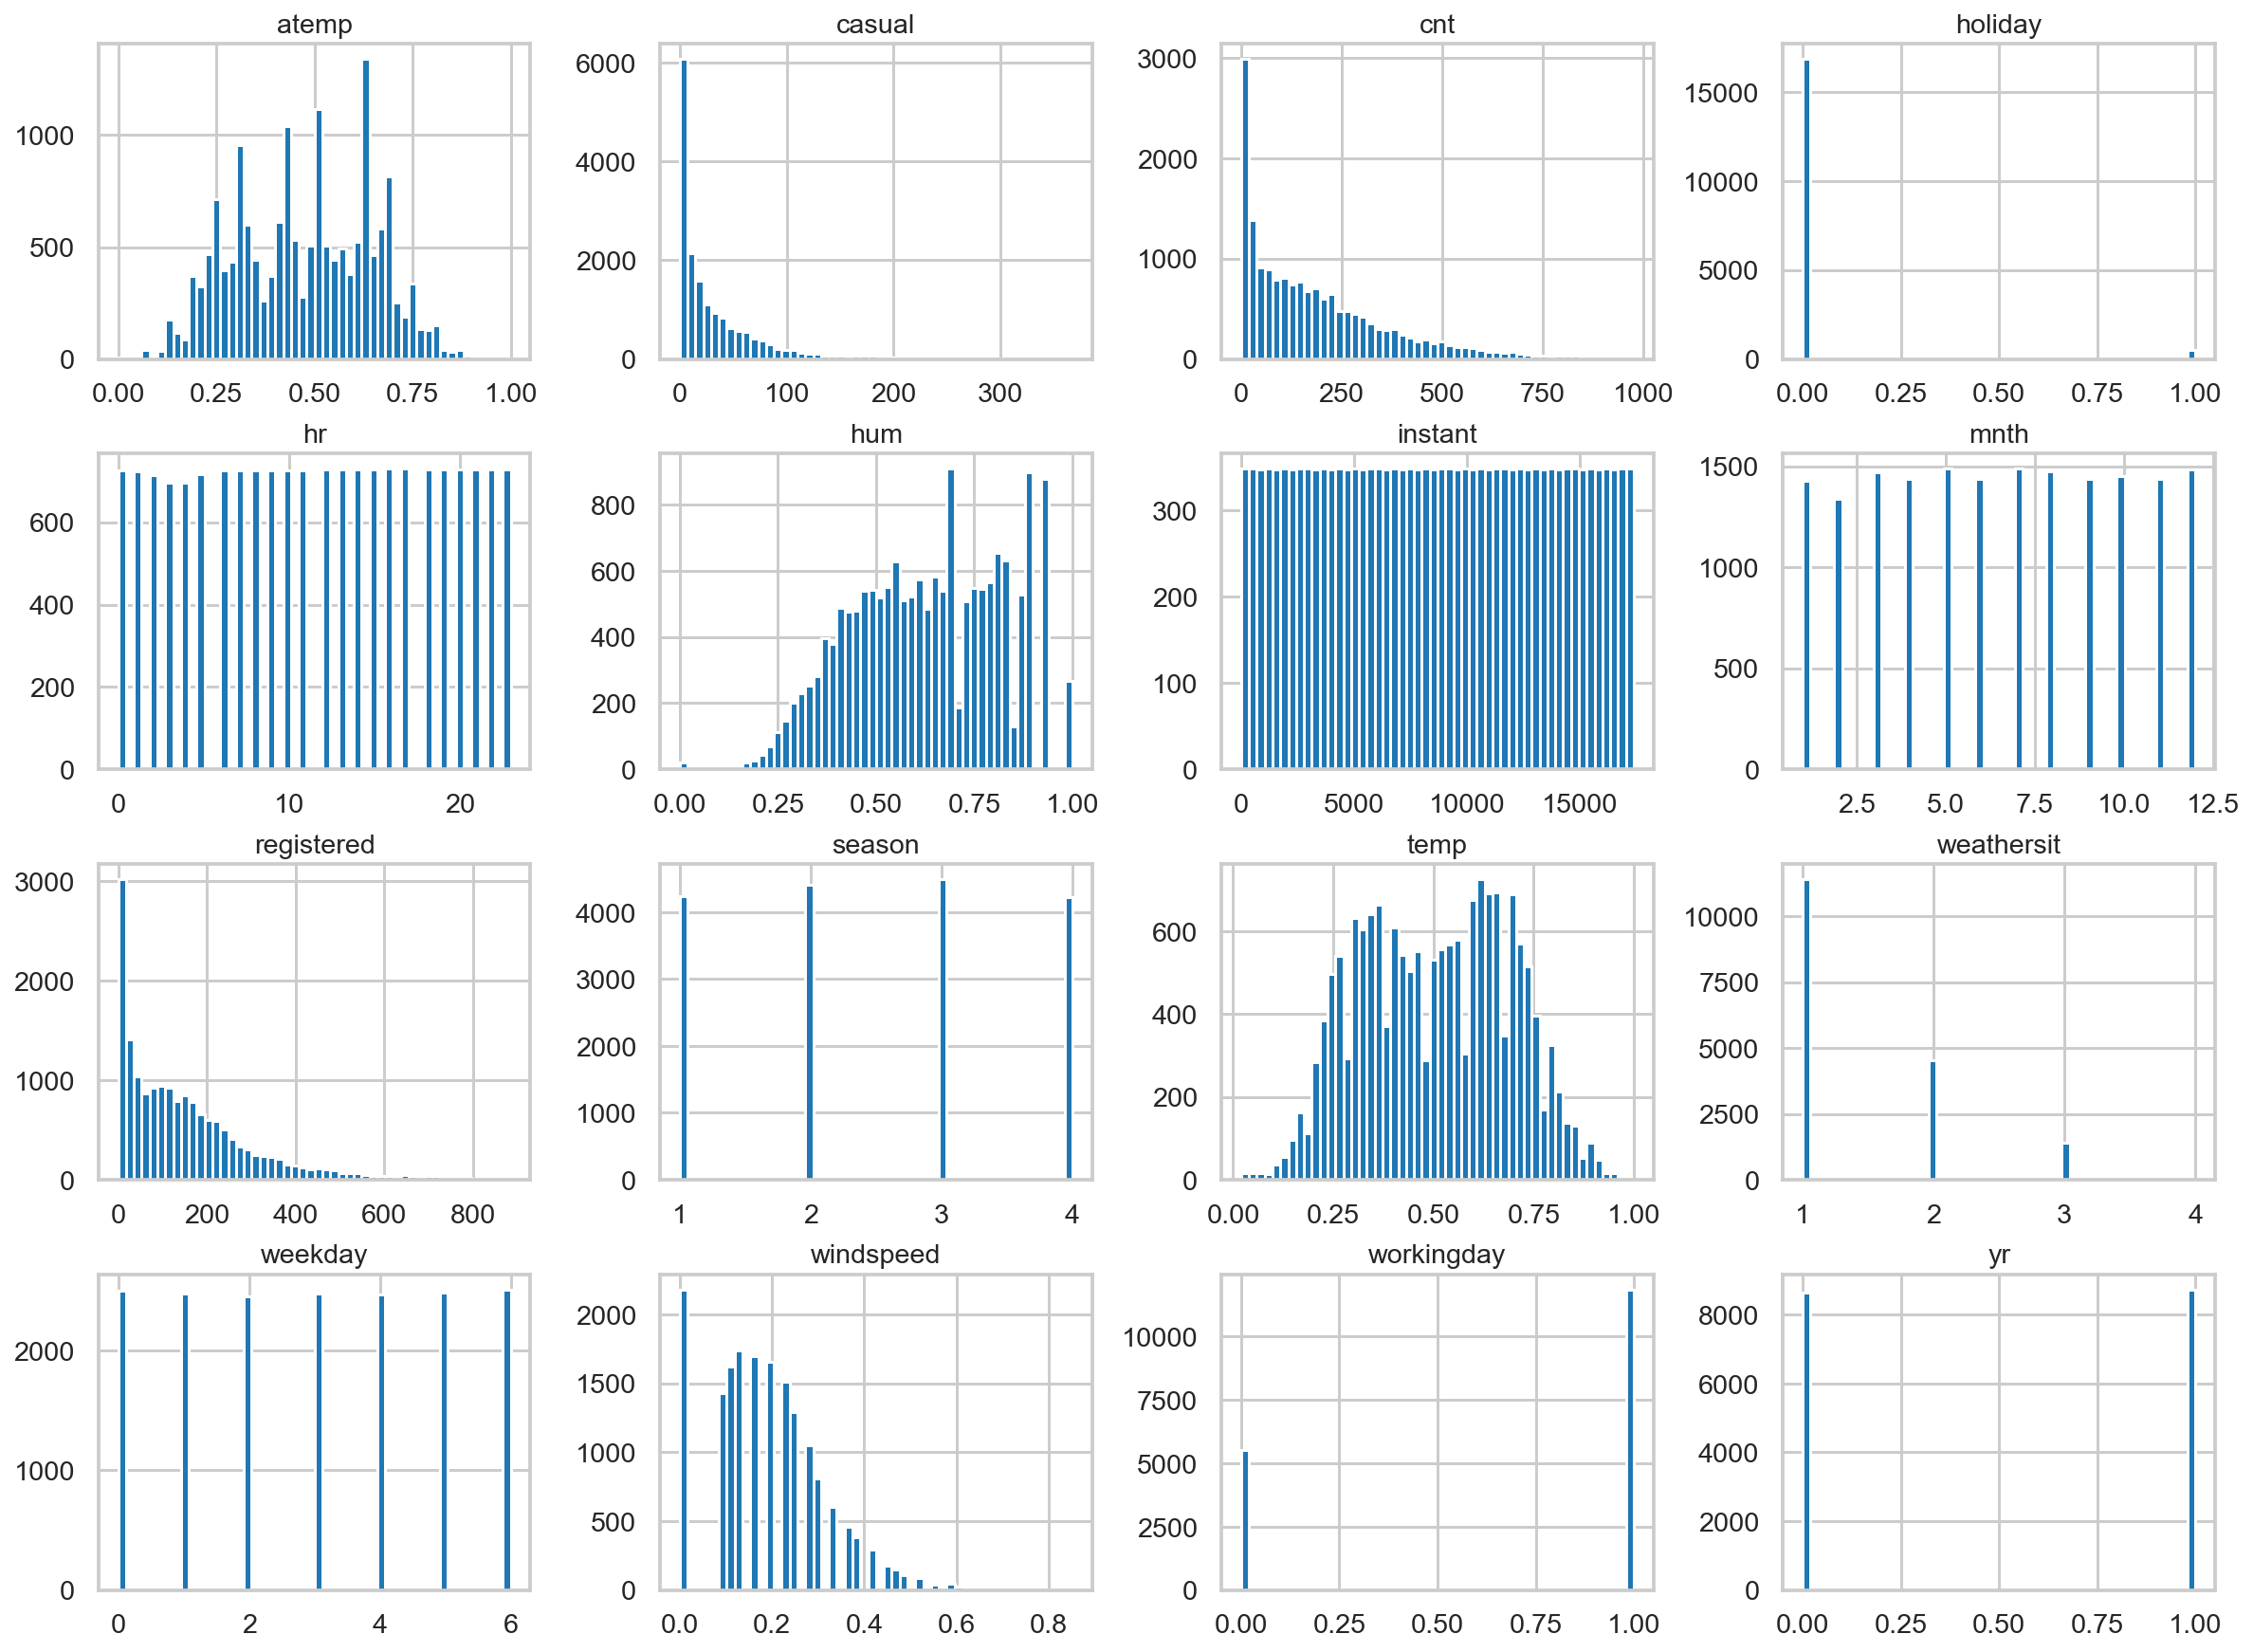

In [164]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Data statistics for each column

In [165]:
df.describe() # Gives the statistics of Numerical variables

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,16982.000000,16819.000000,16879.000000,17373.00000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.503798,0.472834,0.628405,0.19003,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.189146,0.173541,0.193353,0.12229,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.10450,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.520000,0.484800,0.630000,0.19400,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.790000,0.25370,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.85070,367.000000,886.000000,977.000000


Preprocessing

In [166]:
#Renamed the columns to better understanding of variables

df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)
###########################
# Setting proper data types by Typecasting the datetime and numerical attributes
###########################
# date time conversion
df['datetime'] = pd.to_datetime(df.datetime)

# categorical variables
df['season'] = df.season.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weather_condition'] = df.weather_condition.astype('category')
df['workingday'] = df.workingday.astype('category')
df['month'] = df.month.astype('category')
df['year'] = df.year.astype('category')
df['hour'] = df.hour.astype('category')

In [167]:
#Summary of the dataset
df.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,16982.000000,16819.000000,16879.000000,17373.00000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.503798,0.472834,0.628405,0.19003,35.676218,153.786869,189.463088
std,5017.0295,0.189146,0.173541,0.193353,0.12229,49.305030,151.357286,181.387599
min,1.0000,0.020000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.10450,4.000000,34.000000,40.000000
50%,8690.0000,0.520000,0.484800,0.630000,0.19400,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.790000,0.25370,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.85070,367.000000,886.000000,977.000000


    Missing Values

In [168]:
df.isna().sum() #showing missing data

rec_id                 0
datetime               0
season                 0
year                   0
month                  0
hour                   0
holiday                0
weekday                0
workingday             0
weather_condition      0
temp                 397
atemp                560
humidity             500
windspeed              6
casual                 0
registered             0
total_count            0
dtype: int64

In [169]:
mean_value=df['atemp'].mean() #replacing missing values with mean
df['atemp']=df['atemp'].fillna(mean_value)

In [170]:
mean_value=df['temp'].mean()
df['temp']=df['temp'].fillna(mean_value)

In [171]:
mean_value=df['humidity'].mean()
df['humidity']=df['humidity'].fillna(mean_value)

In [172]:
df = df[pd.notnull(df['windspeed'])] #as there were less number of missing values in this column deleted the rows using the function

In [173]:
df.isna().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
hour                 0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

Attributes distributions and trends

In [174]:
#diffrent value counts in each categorical features
categorical_col = ['season', 'year', 'month', 'holiday', 'weekday','workingday', 'weather_condition']
end='\n'+'*'*10+'\n' # end line seperator

for col in categorical_col:
    print(col,':\n',df[col].value_counts(),end=end) # listing frequency of each value for all of the categorical features

season :
 3    4496
2    4409
1    4242
4    4226
Name: season, dtype: int64
**********
year :
 1    8734
0    8639
Name: year, dtype: int64
**********
month :
 7     1488
5     1488
12    1483
8     1475
3     1473
10    1445
6     1440
11    1437
9     1437
4     1437
1     1429
2     1341
Name: month, dtype: int64
**********
holiday :
 0    16873
1      500
Name: holiday, dtype: int64
**********
weekday :
 6    2512
0    2502
5    2487
1    2479
4    2471
3    2469
2    2453
Name: weekday, dtype: int64
**********
workingday :
 1    11859
0     5514
Name: workingday, dtype: int64
**********
weather_condition :
 1    11413
2     4544
3     1413
4        3
Name: weather_condition, dtype: int64
**********


In [175]:
categorical_features = categorical_col
print('Categorical features :',', '.join(categorical_features)) #giving an idea about all categorical features

Categorical features : season, year, month, holiday, weekday, workingday, weather_condition


In [176]:
# weather condition wise  count of bike rental
df[['weather_condition', 'total_count']].groupby(['weather_condition']).sum() #an idea about how the weather conition affects the total count
#when clear mist weather, highest number of count is observed

,total_count
weather_condition,
1,2338173
2,795952
3,157449
4,223


In [177]:
# Holiday wise yearly count of bike rental
df[['season','year', 'total_count', 'holiday']].groupby([ 'year', 'holiday']).sum()

total_count
year holiday             
0    0            1212199
     1              30022
1    0            2001163
     1              48413

In [178]:
# weather condition wise  avg_count of bike rental
df[['weather_condition', 'total_count']].groupby(['weather_condition']).mean().round().astype(int)

,total_count
weather_condition,
1,205
2,175
3,111
4,74


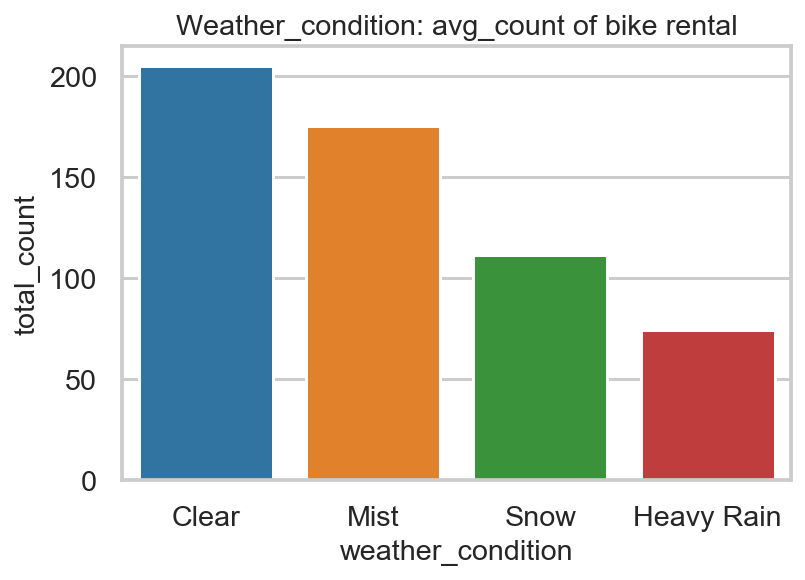

In [179]:
# weather condition wise  avg_count of bike rental
ax = sns.barplot(x='weather_condition',y='total_count',data=df, ci=None)
ax.set_title("Weather_condition: avg_count of bike rental") # set title
ax.set_xticklabels(['Clear', 'Mist', 'Snow', 'Heavy Rain']) # set x-tick labels
plt.show()

Monthly distribution of counts

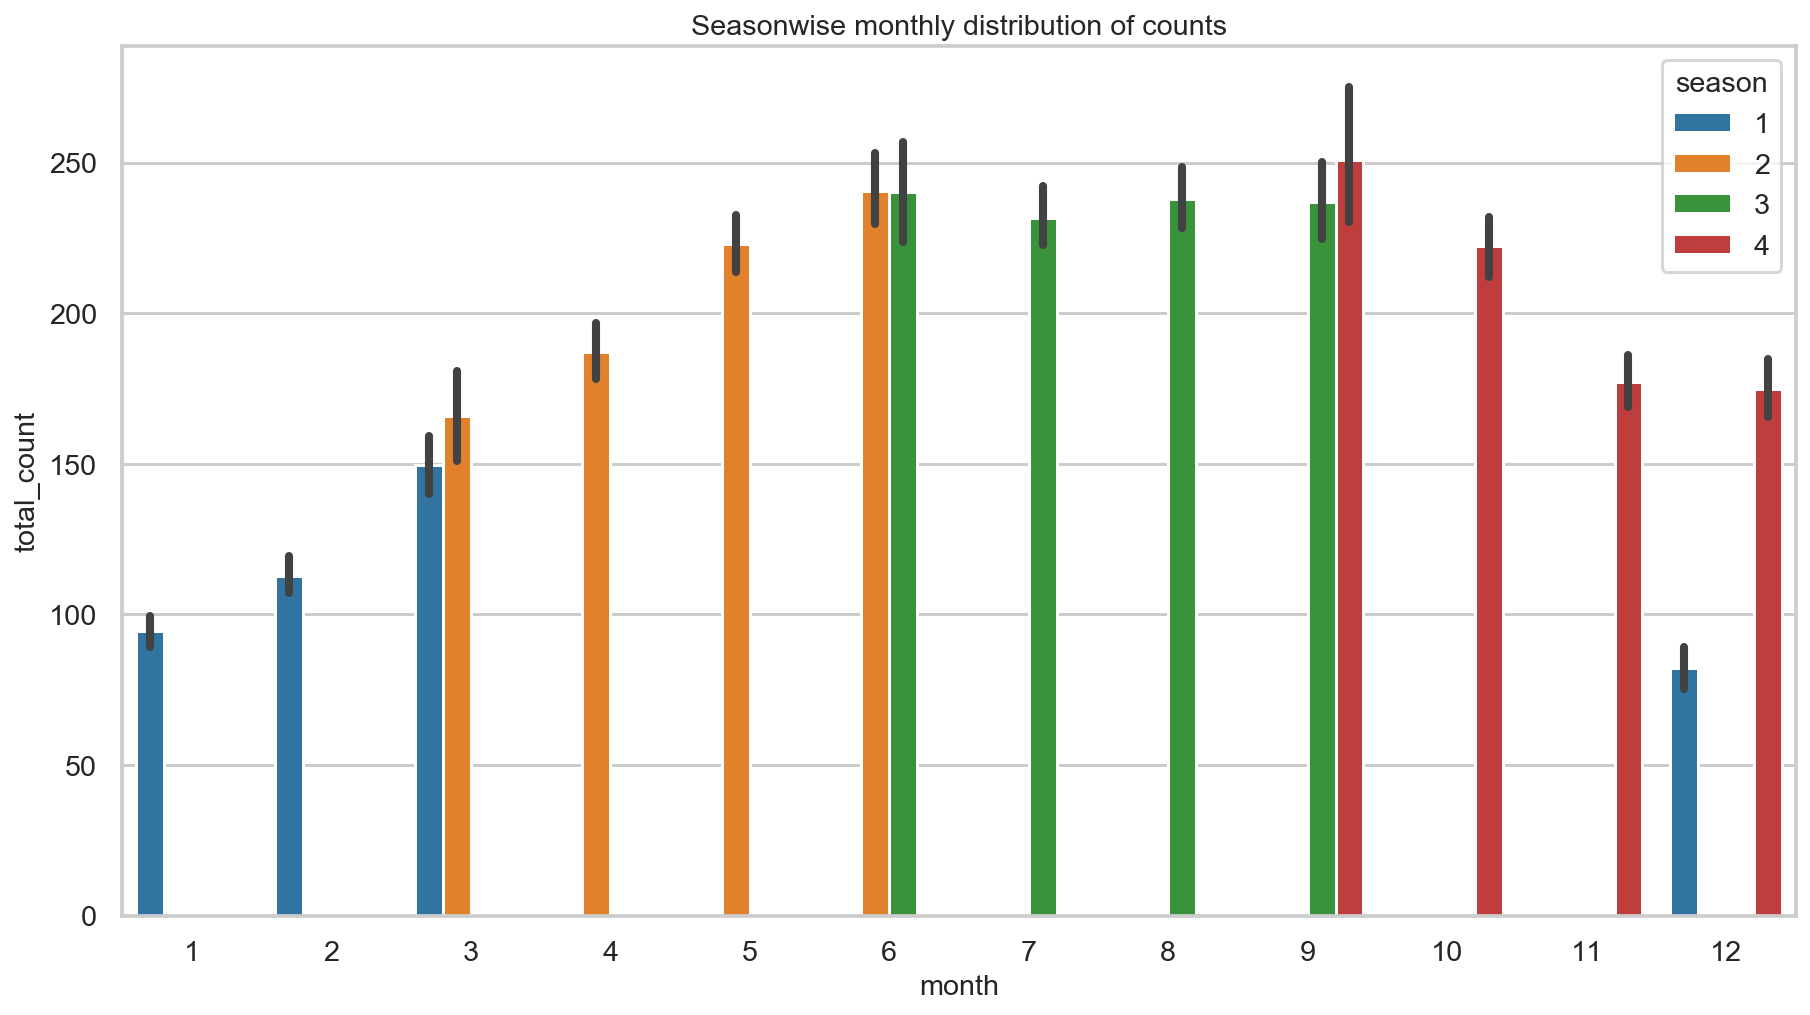

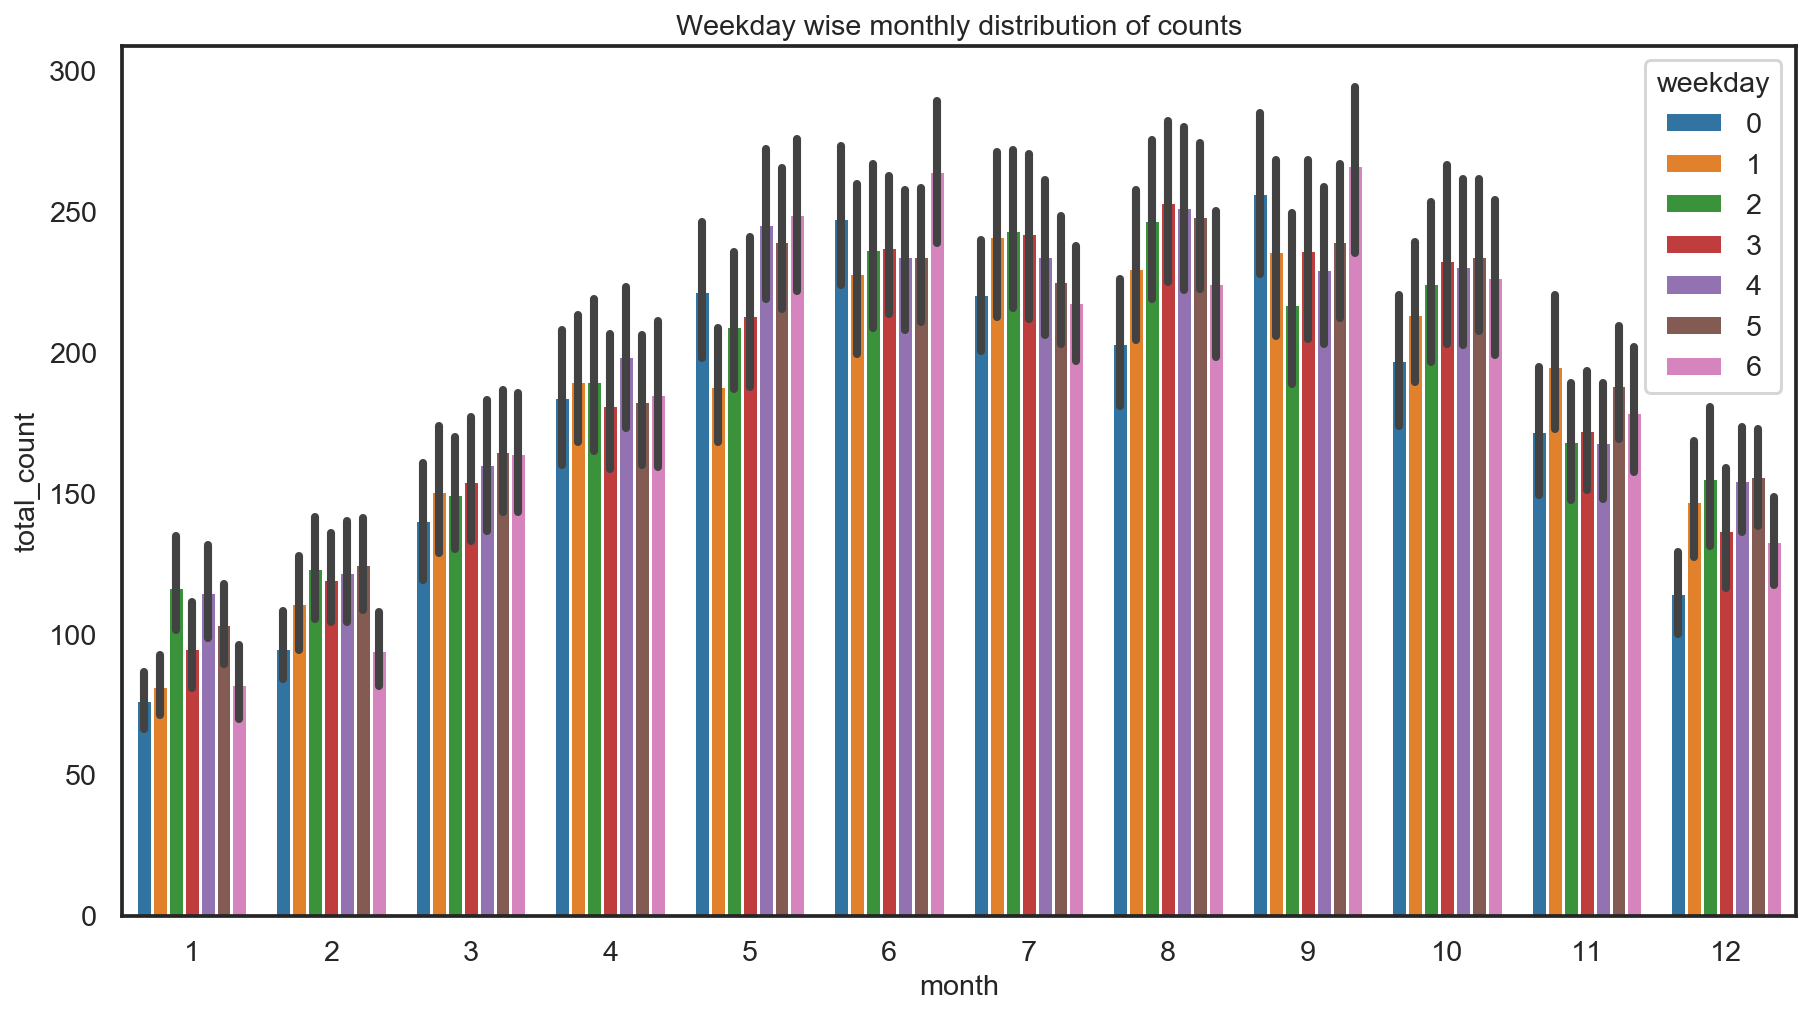

In [180]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='total_count',data=df[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=df[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()


From the above plots, we can observed that increasing the bike rental count in springe and summer season and then decreasing the bike rental count in fall and winter season. Here,

season 1-> spring season 2 -> summer season 3 -> fall season 4 -> winter

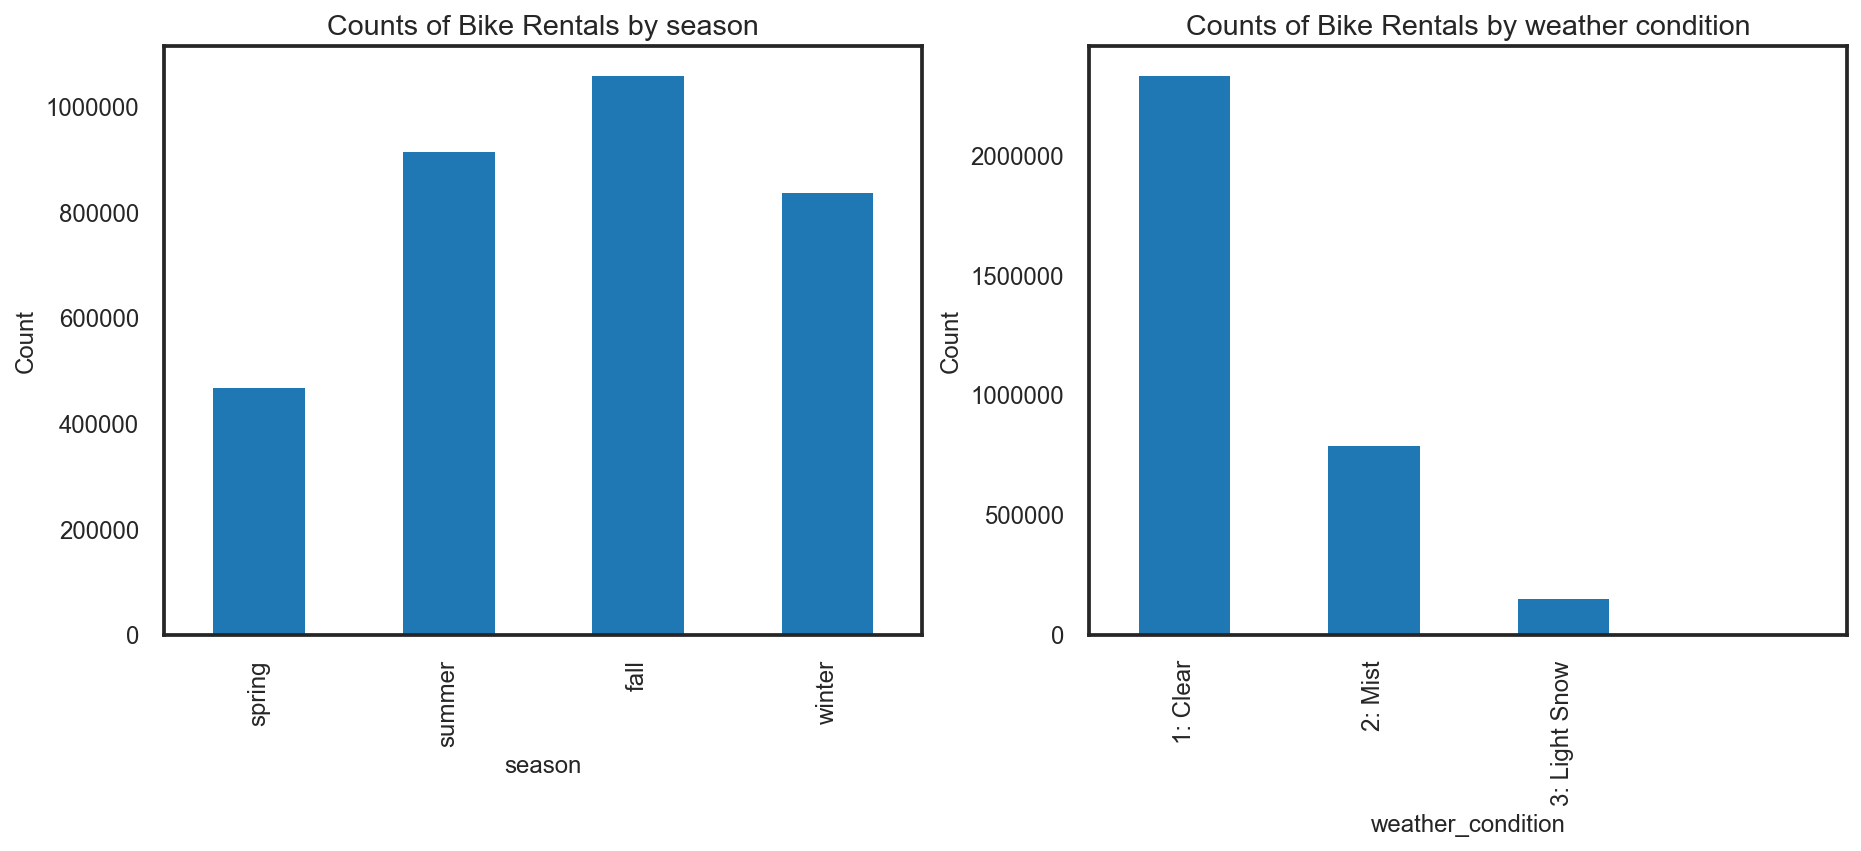

In [181]:
f, (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6)) # 1 row 2 column subplot 

# Counts of Bike Rentals by season
ax1 = df[['season','total_count']].groupby(['season']).sum().reset_index().plot(kind='bar',legend = False, title ="Counts of Bike Rentals by season", stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)  # set x-axis labels
ax1.set_ylabel("Count", fontsize=12)  # set y-axis labels
ax1.set_xticklabels(['spring','summer','fall','winter'])  # set x-tick labels

# Counts of Bike Rentals by weather condition 
ax2 = df[['weather_condition','total_count']].groupby(['weather_condition']).sum().reset_index().plot(kind='bar', legend = False, stacked=True, title ="Counts of Bike Rentals by weather condition", fontsize=12, ax=ax2)
ax2.set_xlabel("weather_condition", fontsize=12)  # set x-axis labels
ax2.set_ylabel("Count", fontsize=12)  # set y-axis labels
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow'])  # set x-tick labels

f.tight_layout()

Outlier Analysis

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

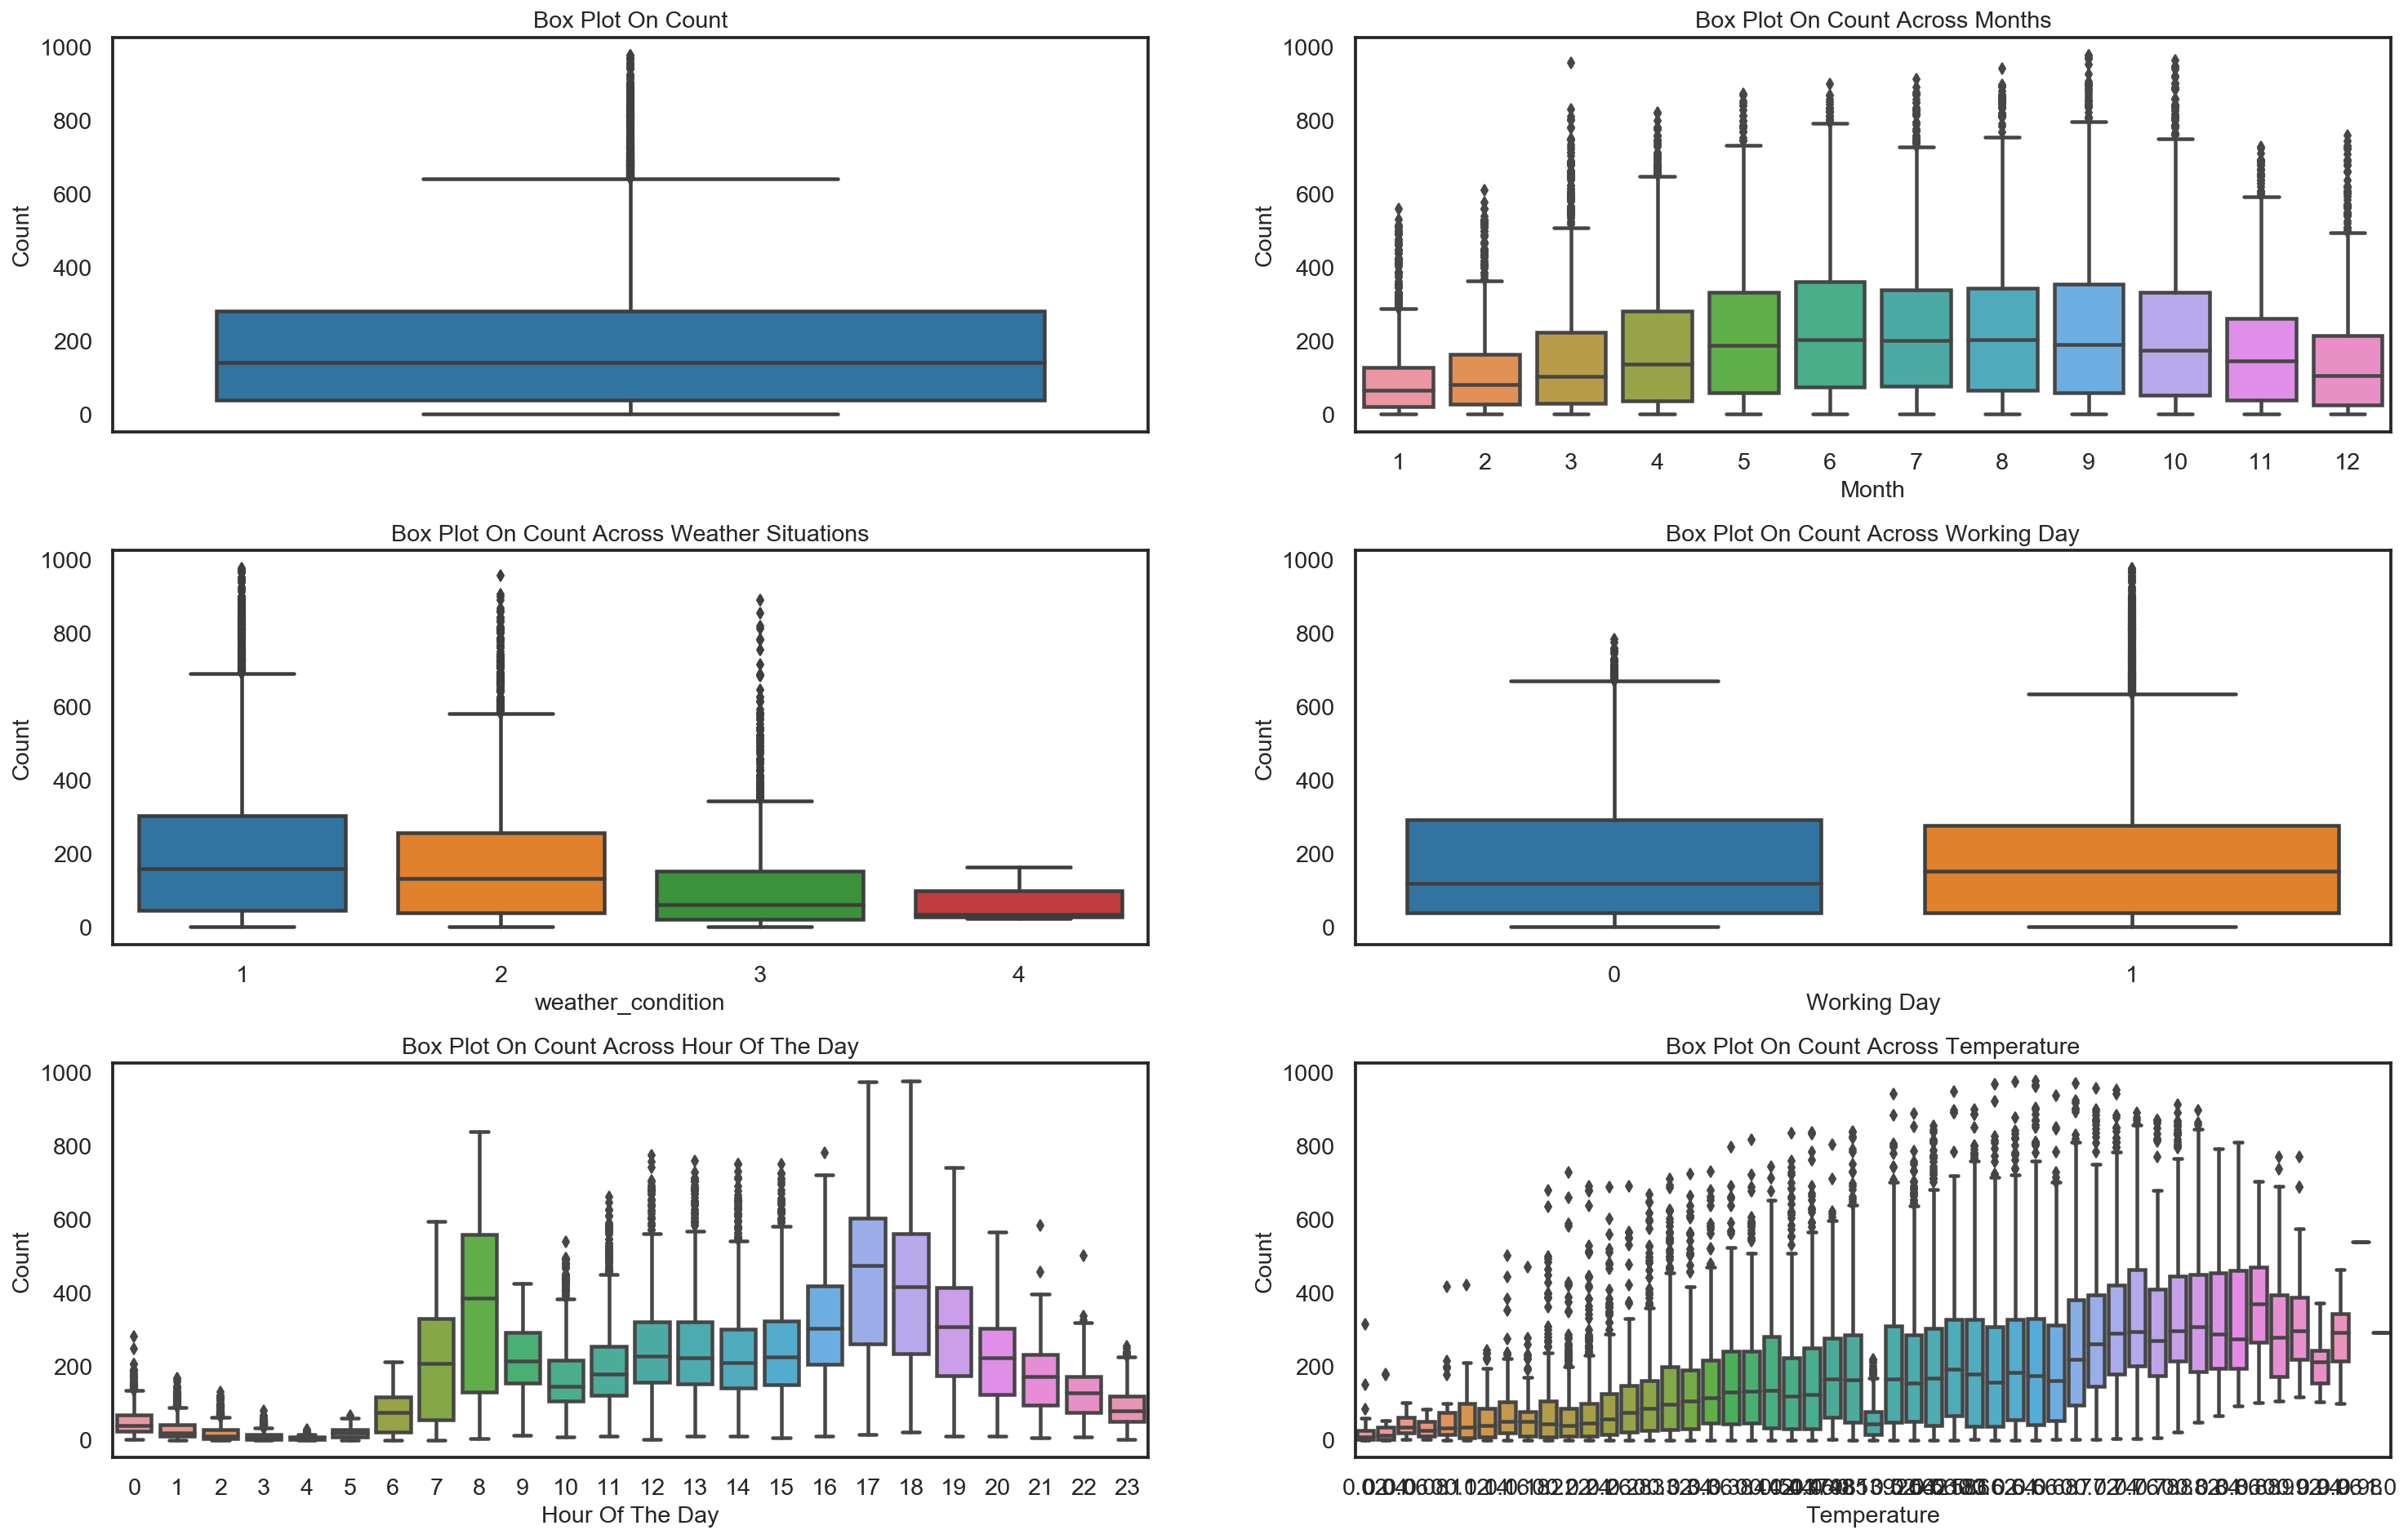

In [182]:
#counting the outliers in the dataset
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(25, 16) 
plt.subplots_adjust(hspace=0.3) # set hspace to avoid overlapping

sns.boxplot(data=df,y="total_count",orient="v",ax=axes[0][0])
sns.boxplot(data=df,y="total_count",x="month",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y="total_count",x="weather_condition",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="total_count",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=df,y="total_count",x="hour",orient="v",ax=axes[2][0])
sns.boxplot(data=df,y="total_count",x="temp",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='weather_condition', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")

The working day and holiday box plots indicate that more bicycles are rent during normal working days than on weekends or holidays. The hourly box plots show a local maximum at 8 am and one at 5 pm which indicates that most users of the bicycle rental service use the bikes to get to work or school. Another important factor seems to be the temperature: higher temperatures lead to an increasing number of bike rents and lower temperatures not only decrease the average number of rents but also shows more outliers in the data.

Text(0.5, 1.0, 'Pairplot for outlier analysis')

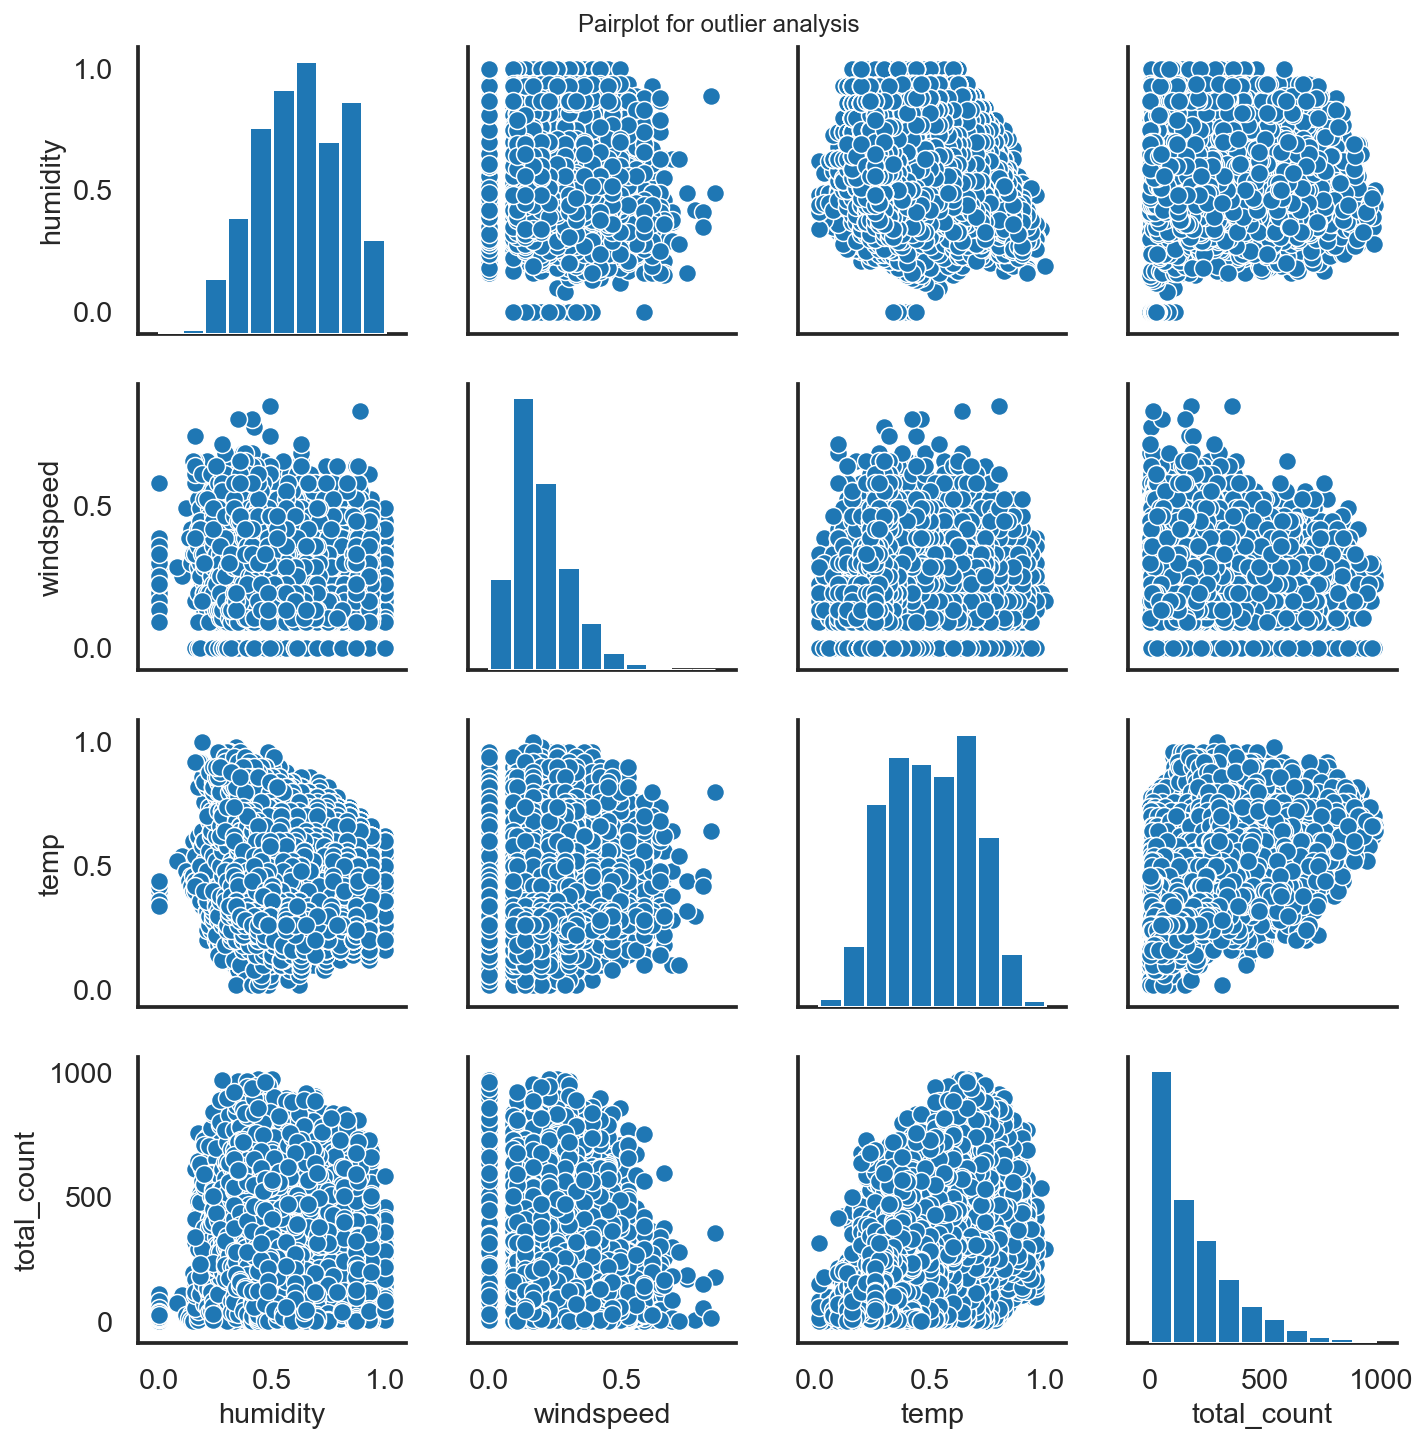

In [183]:
# Pairplot for outlier analysis
ax = sns.pairplot(data=df[['humidity','windspeed','temp','total_count']],palette='hls')
ax.fig.suptitle('Pairplot for outlier analysis', y=1.0)

temp has got positive correlation with count as people like to travel more when the sky is clear.
humidity is inversely related to count as expected as when weather is humid people will not like to travel on a bike.
windspeed is also having a negative correlation with "count".
"atemp" and "temp" variable has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.
"weather_condition" and count are inversely related. This is because for our data as weather increases from (1 to 4) implies that weather is getting more worse and so lesser people will rent bikes.
"registered" and count are highly related which indicates that most of the bikes that are rented are registered.
"Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to dropped during model building to avoid bias. (casual + registered = count)
"instant" variable can also be dropped during model building as it indicates index.

In [184]:
target = df['total_count']
#sns.distplot(df[target[-1]]);

In [185]:
len(target) #lenth of count attribute

17373

The distribution plot of the count values reveals that the count values do not match a normal distribution. We will use the median and interquartile range (IQR) to identify and remove outliers from the data. (An alternative approach would be the transformation of the target values to a normal distribution and using mean and standard deviation.)

Samples in df set with outliers: 17373
Samples in train set without outliers: 16868


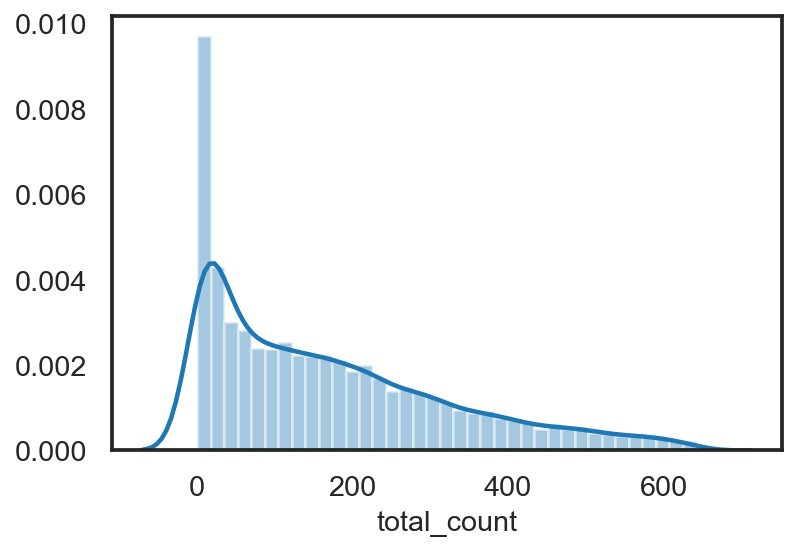

In [186]:
print("Samples in df set with outliers: {}".format(len(df)))
q1 = df.total_count.quantile(0.25)
q3 = df.total_count.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
df_preprocessed = df.loc[(df.total_count >= lower_bound) & (df.total_count <= upper_bound)]
print("Samples in train set without outliers: {}".format(len(df_preprocessed)))
sns.distplot(df_preprocessed.total_count);

Correlation Analysis

In [187]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17373 entries, 0 to 17378
Data columns (total 17 columns):
rec_id               17373 non-null int64
datetime             17373 non-null datetime64[ns]
season               17373 non-null category
year                 17373 non-null category
month                17373 non-null category
hour                 17373 non-null category
holiday              17373 non-null category
weekday              17373 non-null category
workingday           17373 non-null category
weather_condition    17373 non-null category
temp                 17373 non-null float64
atemp                17373 non-null float64
humidity             17373 non-null float64
windspeed            17373 non-null float64
casual               17373 non-null int64
registered           17373 non-null int64
total_count          17373 non-null int64
dtypes: category(8), datetime64[ns](1), float64(4), int64(4)
memory usage: 2.0 MB


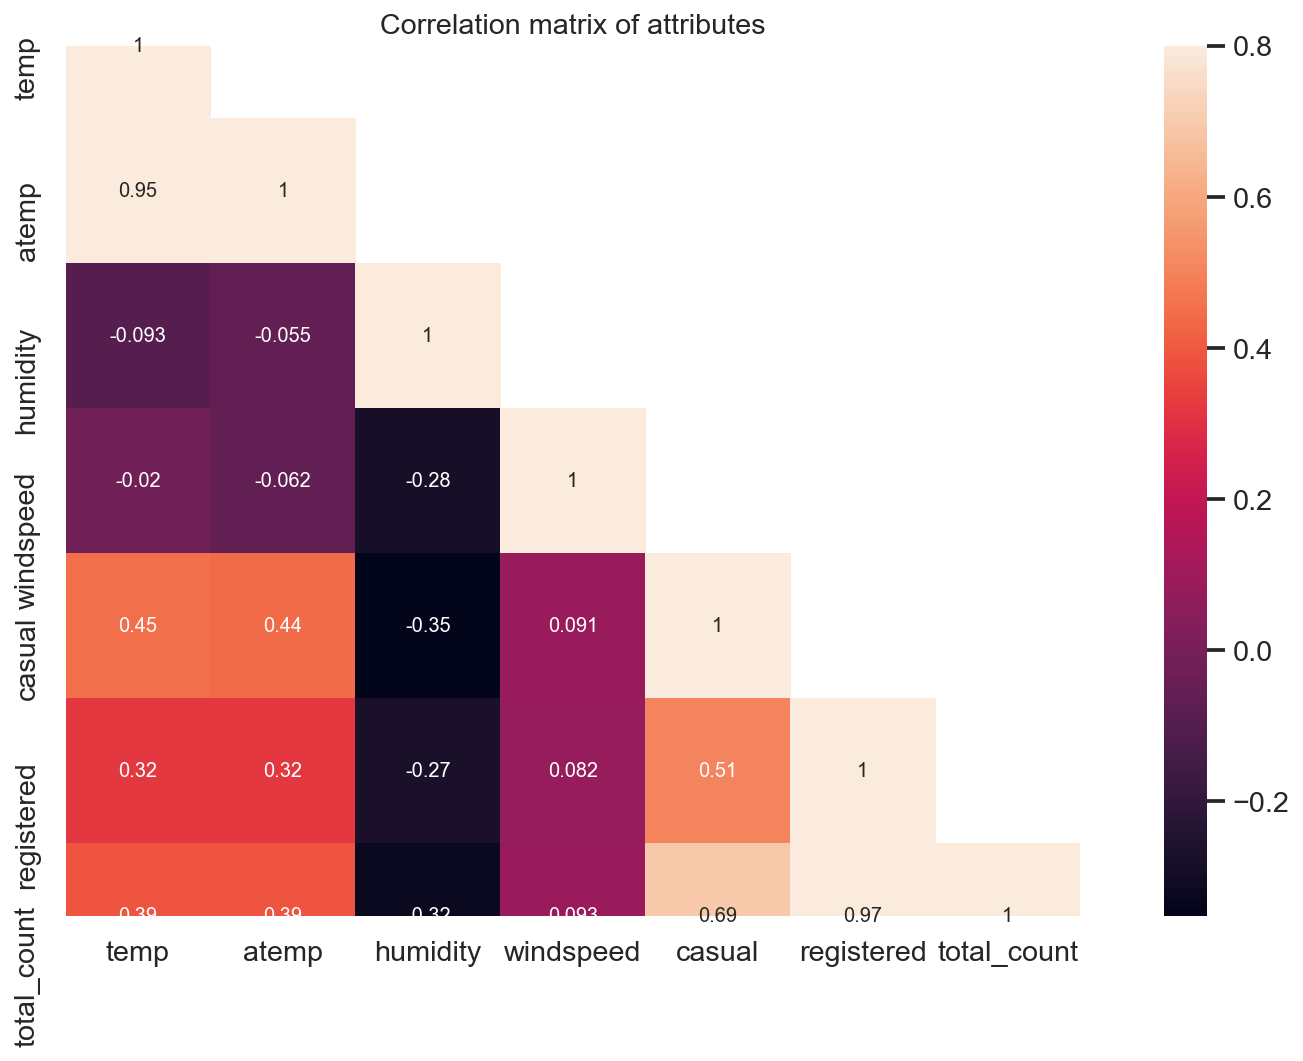

In [188]:
#Create the correlation matrix
correMtr=df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

Casual and registered contain direct information about the bike sharing count which is to predict (data leakage). Therefore they are not considered in the feature set.
The variables "temp" and "atemp" are strongly correlated. To reduce the dimensionality of the predictive model, the feature "atemp" is dismissed.
The variables "hr" and "temp" seem to be promising features for the bike sharing count prediction.
From correlation plot, we can observed that some features are positively correlated or some are negatively correlated to each other. TThe total_count,casual and registered are highly positively correlated to each other. So, we are going to ignore atemp,casual and registered variable for further analysis.

In [189]:
df = df.drop(columns=['atemp'])

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17373 entries, 0 to 17378
Data columns (total 16 columns):
rec_id               17373 non-null int64
datetime             17373 non-null datetime64[ns]
season               17373 non-null category
year                 17373 non-null category
month                17373 non-null category
hour                 17373 non-null category
holiday              17373 non-null category
weekday              17373 non-null category
workingday           17373 non-null category
weather_condition    17373 non-null category
temp                 17373 non-null float64
humidity             17373 non-null float64
windspeed            17373 non-null float64
casual               17373 non-null int64
registered           17373 non-null int64
total_count          17373 non-null int64
dtypes: category(8), datetime64[ns](1), float64(3), int64(4)
memory usage: 1.8 MB


In [191]:
# categorising features
categorical_features = ['season','holiday','weather_condition','weekday','month','year','workingday', 'hour']  
continous_features = ['temp','humidity','windspeed']
dropFeatures = ['casual','datetime','rec_id','registered']
#target=['total_count']

In [192]:
#creating dummies of the categorical variables
df_1=pd.get_dummies(df,columns=categorical_features)
df_1.head()

,rec_id,datetime,temp,humidity,windspeed,casual,registered,total_count,season_1,season_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1,2011-01-01,0.503798,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2011-01-01,0.503798,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2011-01-01,0.503798,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2011-01-01,0.503798,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2011-01-01,0.503798,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
final_df = df_1.drop(dropFeatures, axis=1) #dropping unwanted features which wont  be used in analysis

In [194]:
final_df.shape #give the overall no of instances and attributed after creating dummies of categorical variable used to create hot vector

(17373, 61)

In [195]:
X = final_df.as_matrix(['season_1', 'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1', 'weather_condition_1','weather_condition_2','weather_condition_3','weather_condition_4','weekday_0', 'weekday_1', 'weekday_2', 'weekday_3','weekday_4', 'weekday_5','weekday_6',
                    'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9','month_10','month_11',
                    'month_12','year_0', 'year_1','workingday_0', 'workingday_1','hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
                   'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22','hour_23'] )
y = target

c:\users\priyanka\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [196]:
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X,y,test_size=.3,random_state=0)

In [197]:
X_train_org.shape

(12161, 57)

In [198]:
# Using Standard scaler #Such scaling was done because we wanted to transform the data in such a manner that it has mean as 0 and standard deviation as 1.
from sklearn.preprocessing import StandardScaler, OneHotEncoder
def transform_and_fit(ds):
    final_df=ds
    
# Define which columns should be encoded vs scaled

    columns_to_encode = ['season_1', 'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1', 'weather_condition_1','weather_condition_2','weather_condition_3','weather_condition_4','weekday_0', 'weekday_1', 'weekday_2', 'weekday_3','weekday_4', 'weekday_5','weekday_6',
                        'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9','month_10','month_11',
                        'month_12','year_0', 'year_1','workingday_0', 'workingday_1','hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
                       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22','hour_23']  
    columns_to_scale = ['temp','humidity','windspeed']
    # Instantiate encoder/scaler
    scaler = StandardScaler()
    ohe    = OneHotEncoder(sparse=False)
    scaled_columns  = scaler.fit_transform(final_df[columns_to_scale])
    encoded_columns =  ohe.fit_transform(final_df[columns_to_encode])
    final = np.concatenate([scaled_columns, encoded_columns], axis=1)
    return final

In [199]:
finall = transform_and_fit(final_df)

c:\users\priyanka\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [200]:
#manual separation was required as the dataframe after encoding and concatenating, was turned down into arry i.e numpy array. 
#The dataframe needed to be in pandas 
X_train_org = finall[0:12000]
X_test_org = finall[12000:]
y_train_org = target[0:12000]
y_test_org = target[12000:]

In [201]:
X_train_org.shape

(12000, 117)

In [202]:
y_train_org.shape

(12000,)

# Bagging Regressor

Decision Tree

In [47]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42) #base regressor
bag_dtreg = BaggingRegressor(dt_reg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_dtreg.fit(X_train_org, y_train_org.values.ravel())
y_bag_dtreg_pred = bag_dtreg.predict(X_test_org)

In [48]:
print('Train score: {:.2f}'.format(bag_dtreg.score(X_train_org, y_train_org)*100))
print('Test score: {:.2f}'.format(bag_dtreg.score(X_test_org, y_test_org )*100))

Train score: 57.21
Test score: 39.39


Linear SVR

In [51]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import LinearSVR

linsvr_reg = LinearSVR(random_state=42)
bag_linsvr = BaggingRegressor(linsvr_reg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_linsvr.fit(X_train_org, y_train_org.values.ravel())
y_bag_linsvr_pred = bag_linsvr.predict(X_test_org)

In [52]:
print('Train score: {:.2f}'.format(bag_linsvr.score(X_train_org, y_train_org)*100))
print('Test score: {:.2f}'.format(bag_linsvr.score(X_test_org, y_test_org )*100))

Train score: 64.91
Test score: 53.16


# Pasting 

Decision Tree

In [53]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)
paste_dtreg = BaggingRegressor(dt_reg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=42)

paste_dtreg.fit(X_train_org, y_train_org.values.ravel())
y_paste_dtreg_pred = paste_dtreg.predict(X_test_org)

In [54]:
print('Train score: {:.2f}'.format(paste_dtreg.score(X_train_org, y_train_org)*100))
print('Test score: {:.2f}'.format(paste_dtreg.score(X_test_org, y_test_org)*100))

Train score: 57.18
Test score: 39.46


Linear SVR

In [55]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import LinearSVR

linsvr_reg = LinearSVR(random_state=42)
paste_linsvr = BaggingRegressor(linsvr_reg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=42)

paste_linsvr.fit(X_train_org, y_train_org.values.ravel())
y_paste_linsvr_pred = paste_linsvr.predict(X_test_org)

In [56]:
print('Train score: {:.2f}'.format(paste_linsvr.score(X_train_org, y_train_org)*100))
print('Test score: {:.2f}'.format(paste_linsvr.score(X_test_org, y_test_org)*100))

Train score: 64.91
Test score: 53.16


In both the cases i.e bagging and pasting, Linear SVR model has generated the same accuracy. It can be seen that the stability of the final model has increased and errors are reduced when compared with individual performance of the model. 

However in the case of decision tree, both the ensemble models have predicted same.  
Pasting and Bagging are giving almost the same accuracies in both cases.


# Adaboost boosting

Lasso

In [66]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso

lasso_reg = Lasso(random_state=42)
adaboost_lassoreg = AdaBoostRegressor(lasso_reg, n_estimators=50, learning_rate=1.0, random_state=42)

adaboost_lassoreg.fit(X_train_org, y_train_org.values.ravel())
y_adaboost_lassoreg_pred = adaboost_lassoreg.predict(X_test_org)

In [67]:
print('Train score: {:.2f}'.format(adaboost_lassoreg.score(X_train_org, y_train_org)*100))
print('Test score: {:.2f}'.format(adaboost_lassoreg.score(X_test_org, y_test_org)*100))

Train score: 64.49
Test score: 55.58


Ridge

In [62]:
from sklearn.ensemble import AdaBoostRegressor
from  sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=42)
adaboost_ridgereg = AdaBoostRegressor(ridge_reg, n_estimators=50, learning_rate=1.0, random_state=42)

adaboost_ridgereg.fit(X_train_org, y_train_org.values.ravel())
y_adaboost_ridgereg_pred = adaboost_ridgereg.predict(X_test_org)

In [63]:
print('Train score: {:.2f}'.format(adaboost_ridgereg.score(X_train_org, y_train_org)*100))
print('Test score: {:.2f}'.format(adaboost_ridgereg.score(X_test_org, y_test_org)*100))

Train score: 65.22
Test score: 59.27


# Gradient Boosting

Decision Tree

In [70]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt_reg = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1, random_state=42) #assigning weight to the instance through learning rate

gbrt_reg.fit(X_train_org, y_train_org)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [71]:
print('Train score: {:.2f}'.format(gbrt_reg.score(X_train_org, y_train_org)*100))
print('Test score: {:.2f}'.format(gbrt_reg.score(X_test_org, y_test_org)*100))

Train score: 43.49
Test score: 34.19


# PCA

In [203]:
from sklearn.decomposition import PCA

pca = PCA(.95)
X_PCAtrans = pca.fit_transform(X_train_org)

In [204]:
variance_ratio=pca.explained_variance_ratio_

In [205]:
variance_ratio

array([0.12953007, 0.11530527, 0.08899455, 0.07201634, 0.06792981,
       0.04977399, 0.04208921, 0.02861006, 0.02382096, 0.02267945,
       0.02243624, 0.02228353, 0.02218715, 0.0194348 , 0.0186989 ,
       0.01785869, 0.01593627, 0.01264119, 0.00988183, 0.00967392,
       0.00941506, 0.00908307, 0.00876794, 0.00813486, 0.00659989,
       0.0065922 , 0.00658707, 0.00658588, 0.00657707, 0.00657403,
       0.00657402, 0.00657402, 0.00657401, 0.00657401, 0.00657379,
       0.00657127, 0.00656852, 0.00656474, 0.0065622 , 0.00655292])

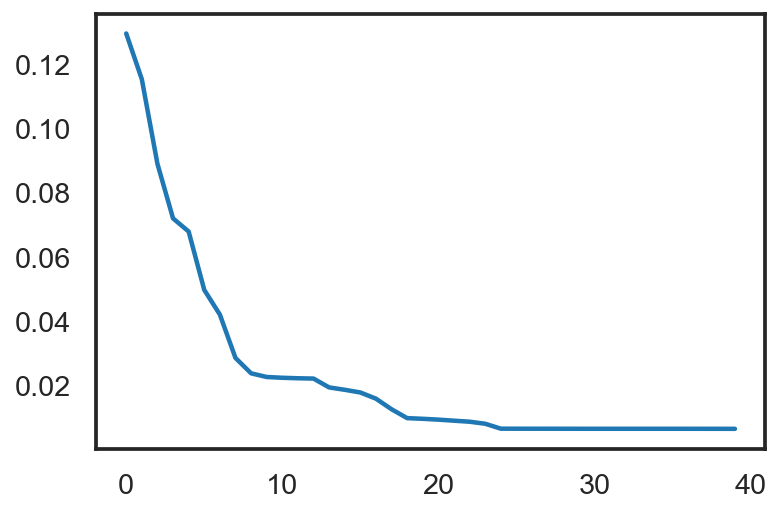

In [206]:
import matplotlib.pyplot as plt
plt.plot(variance_ratio)

In [207]:
pca = PCA(n_components = 5)
X_PCAtrans = pca.fit_transform(X_train_org)

In [208]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_PCAtrans, y_train_org, shuffle = True, test_size = 0.30, random_state=42)

# Ridge with PCA

In [274]:
from  sklearn.linear_model import Ridge

param_grid = {"alpha":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0,.00001]}
grid_ridge = GridSearchCV(estimator = Ridge(), param_grid = param_grid, cv = 10, scoring = 'r2')
grid_ridge.fit(X_pca_train, y_pca_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.02, 0.005, 0.002, 0.001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [275]:
print(grid_ridge.best_score_)
print(grid_ridge.best_params_)

0.21517441327148965
{'alpha': 0.02}


In [276]:
from  sklearn.linear_model import Ridge

x_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(0.02)
    ridge.fit(X_pca_train, y_pca_train)
    train_score_list.append(ridge.score(X_pca_train, y_pca_train))
    test_score_list.append(ridge.score(X_pca_test, y_pca_test))

In [277]:
print("Train: {}".format(train_score_list))
print("Test: {}".format(test_score_list))

Train: [0.21769757808397072, 0.21769757808397072, 0.21769757808397072, 0.21769757808397072, 0.21769757808397072, 0.21769757808397072]
Test: [0.22822277487339374, 0.22822277487339374, 0.22822277487339374, 0.22822277487339374, 0.22822277487339374, 0.22822277487339374]


In [278]:
y_pr=ridge.predict(X_pca_test)
y_pr

array([178.86426453,  68.09113369, 108.65882299, ..., 161.91421129,
       200.9671015 , 115.12944869])

Text(0.5, 0, '$\\alpha$')

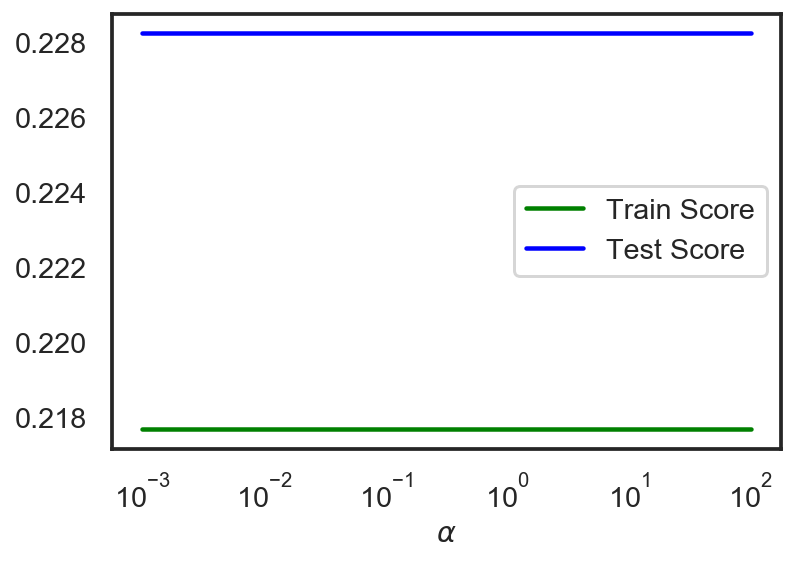

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 5)
plt.xlabel(r'$\alpha$')

In [279]:
ridge = Ridge(alpha = 0.02)
r= ridge.fit(X_pca_train, y_pca_train)
print('Train score: {:.4f}'.format(r.score(X_pca_train, y_pca_train)*100))
print('Test score: {:.4f}'.format(r.score(X_pca_test, y_pca_test)*100))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pca_test, y_pr)))

Train score: 21.7698
Test score: 22.8223
RMSE: 132.55516701467238


In [280]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=r, X=X_pca_train, y=y_pca_train, cv=5)
print("Cross Validation Scores are: {}".format(all_accuracies))
print("Cross Validation Score: {}".format(all_accuracies.mean()))

Cross Validation Scores are: [0.2018842  0.19486198 0.22780411 0.23201167 0.2214308 ]
Cross Validation Score: 0.21559855217166146


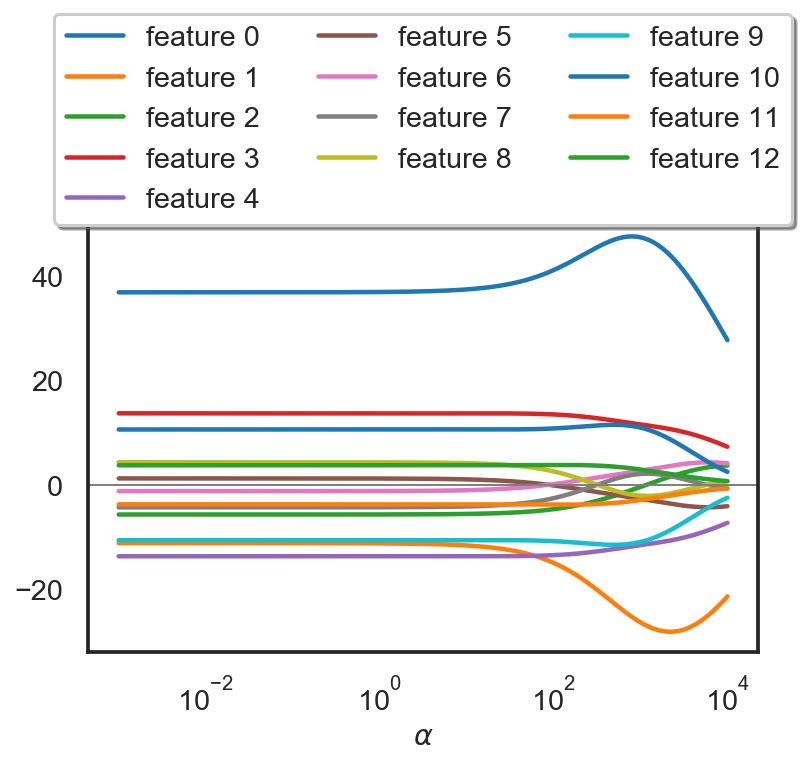

In [96]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_org,y_train_org)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [281]:
report_table = [['Ridge', 'alpha = 0.02', grid_ridge.score(X_pca_train, y_pca_train)*100, grid_ridge.score(X_pca_test, y_pca_test)*100]]


# Lasso with PCA

In [282]:
from sklearn.linear_model import Lasso
param_grid = {"alpha":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0,.00001]}
grid_lasso = GridSearchCV(Lasso(), param_grid = param_grid, cv = 10, scoring = 'r2')

grid_lasso.fit(X_pca_train, y_pca_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.02, 0.005, 0.002, 0.001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [283]:
print(grid_lasso.best_score_)
print(grid_lasso.best_params_) #estimating best value for alpha

0.21517530786666098
{'alpha': 0.02}


In [284]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_pca_train, y_pca_train)
    train_score_list.append(lasso.score(X_pca_train, y_pca_train))
    test_score_list.append(lasso.score(X_pca_test, y_pca_test))

In [285]:
y_pr=lasso.predict(X_pca_test)
y_pr

array([158.73547619, 158.73547619, 158.73547619, ..., 158.73547619,
       158.73547619, 158.73547619])

In [286]:
lasso = Lasso(alpha = 0.02)
lasso.fit(X_pca_train, y_pca_train)
print('Train score: {:.4f}'.format(lasso.score(X_pca_train, y_pca_train)*100))
print('Test score: {:.4f}'.format(lasso.score(X_pca_test, y_pca_test)*100))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pca_test, y_pr)))

Train score: 21.7698
Test score: 22.8214
RMSE: 150.88731785424486


In [287]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=lasso, X=X_pca_train, y=y_pca_train, cv=10)
print("Cross Validation Scores are: {}".format(all_accuracies))
print("Cross Validation Score: {}".format(all_accuracies.mean()))

Cross Validation Scores are: [0.20120639 0.20302561 0.17806293 0.20878856 0.21940763 0.23436172
 0.23005583 0.23294921 0.22739247 0.21650273]
Cross Validation Score: 0.21517530786666095


Text(0.5, 0, '$\\alpha$')

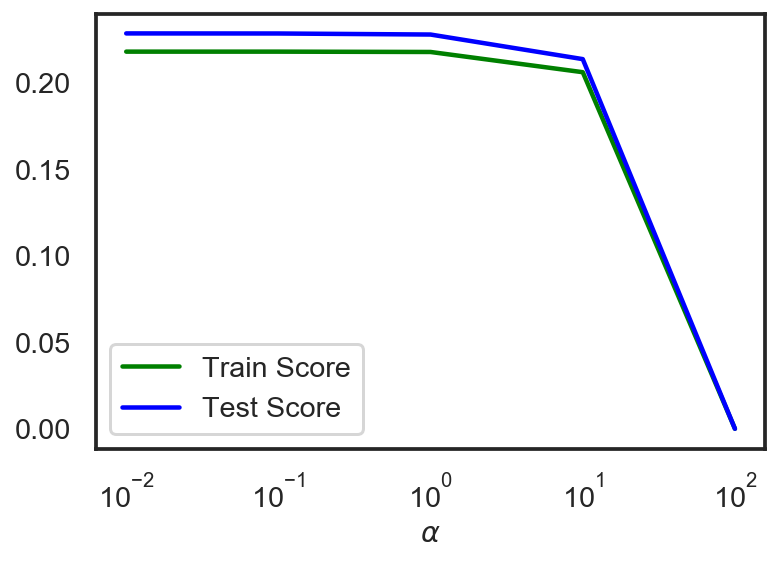

In [96]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [288]:
report_table = report_table + [['LASSO Regressor', 'alpha = 0.02', grid_lasso.score(X_pca_train, y_pca_train)*100, grid_lasso.score(X_pca_test, y_pca_test)*100]]


# KNN Regressor with PCA

In [289]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knnScoring =  'r2'
param_grid = {"n_neighbors":[1,2,3,4,5]}
knnr = KNeighborsRegressor()

## Perform the grid search over the parameters
grid_knnr = GridSearchCV(estimator = knnr, param_grid = param_grid, cv = 10, scoring = knnScoring, n_jobs=-1)
grid_knnr.fit(X_pca_train, y_pca_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1, param_grid={'n_neighbors': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [290]:
print(grid_knnr.best_estimator_.n_neighbors)
print(grid_knnr.best_score_)

5
0.2770025720601785


In [291]:
knn = KNeighborsRegressor(5)    #Passing k= 5 as recommended above for best value of k
k = knn.fit(X_pca_train, y_pca_train)
y_pr=knn.predict(X_pca_test)
y_pr

array([ 71.4,  94.8, 105.8, ..., 289.8, 133.2, 158.8])

In [292]:
print('Train score: {:.4f}'.format(k.score(X_pca_train, y_pca_train)*100))
print('Test score: {:.4f}'.format(k.score(X_pca_test, y_pca_test)*100))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pca_test, y_pr)))

Train score: 52.7674
Test score: 32.1378
RMSE: 124.29817563692022


In [293]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=knn, X=X_pca_train, y=y_pca_train, cv=10)
print("Cross Validation Scores are: {}".format(all_accuracies))
print("Cross Validation Score: {}".format(all_accuracies.mean()))

Cross Validation Scores are: [0.28692052 0.287003   0.20802572 0.26797562 0.29634601 0.30268815
 0.26731906 0.30900916 0.27658181 0.26815665]
Cross Validation Score: 0.27700257206017853


Text(0, 0.5, 'MSE')

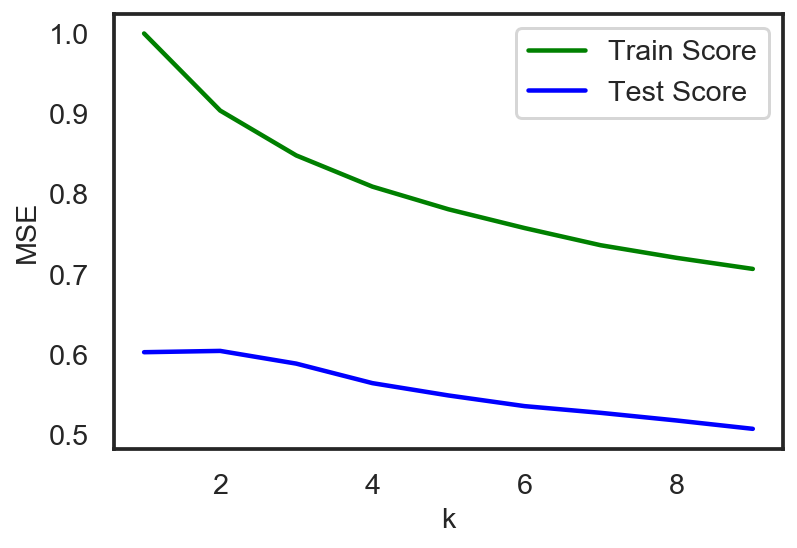

In [103]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_org, y_train_org)
    train_score_array.append(knn_reg.score(X_train_org, y_train_org))
    test_score_array.append(knn_reg.score(X_test_org,y_test_org))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [294]:
report_table = report_table + [['KNN Regressor', 'k = 5', grid_knnr.score(X_pca_train, y_pca_train)*100, grid_knnr.score(X_pca_test, y_pca_test)*100]]


# Linear Regression with PCA

Didnt use grid search as there arent any hyper parameters which are required the model.

In [295]:
from sklearn import linear_model

lin_mod = linear_model.LinearRegression(fit_intercept = True)
lin_mod.fit(X_pca_train, y_pca_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [296]:
print(lin_mod.score(X_pca_train, y_pca_train))
print(lin_mod.score(X_pca_test, y_pca_test))

0.21769757808478685
0.2282227864883218


In [297]:
linearModel = LinearRegression(n_jobs = -1)
linearModel.fit(X_pca_train, y_pca_train)

lr_score = cross_val_score(linearModel,X_pca_train, y_pca_train,cv=10)
print("Cross Validation Scores are: {}".format(lr_score))
print("Cross Validation Score: {}".format(lr_score.mean()*100))

Cross Validation Scores are: [0.20120455 0.20302844 0.17802413 0.20879103 0.21938513 0.23438651
 0.23007299 0.23294993 0.2273983  0.21650309]
Cross Validation Score: 21.517440806053784


In [298]:
y_pr= linearModel.predict(X_pca_test)
y_pr

array([178.86430847,  68.09095643, 108.6587211 , ..., 161.91424059,
       200.96719332, 115.12935794])

In [299]:
print("Train Score: {:.4f}".format(lin_mod.score(X_pca_train, y_pca_train)*100))
print("Test Score: {:.4f}".format(lin_mod.score(X_pca_test, y_pca_test)*100))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pca_test, y_pr)))

Train Score: 21.7698
Test Score: 22.8223
RMSE: 132.55516601722215


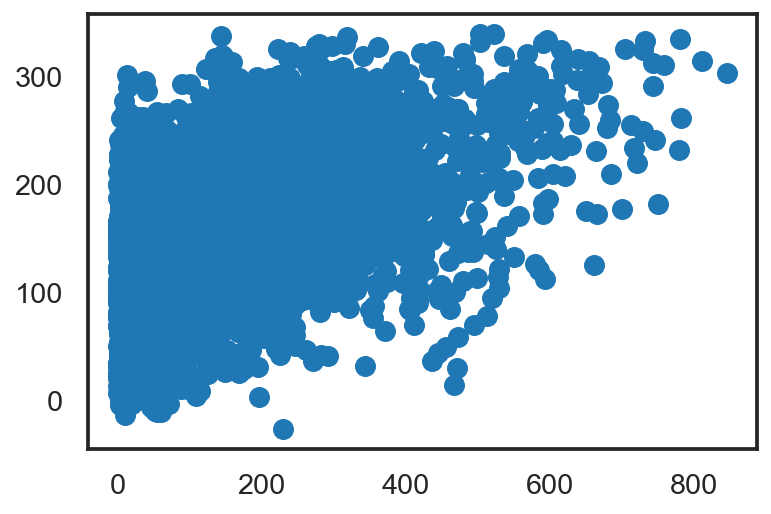

In [112]:
plt.scatter(y_pca_test,y_pr)

In [300]:
report_table = report_table + [['Linear Regressor', '', lin_mod.score(X_pca_train, y_pca_train)*100, lin_mod.score(X_pca_test, y_pca_test)*100]]

# Polynomial Regression

In [301]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []

for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_pca_train)
    X_test_poly = poly.transform(X_pca_test)
    lin_mod.fit(X_train_poly, y_pca_train)
    train_score_list.append(lin_mod.score(X_train_poly, y_pca_train))
    test_score_list.append(lin_mod.score(X_test_poly, y_pca_test))
poly_score_list = pd.DataFrame({"Train score": train_score_list, "Test score": test_score_list})   
poly_score_list

,Train score,Test score
0,0.217698,0.228223
1,0.263789,0.264606
2,0.308523,0.303771
3,0.346708,0.332452


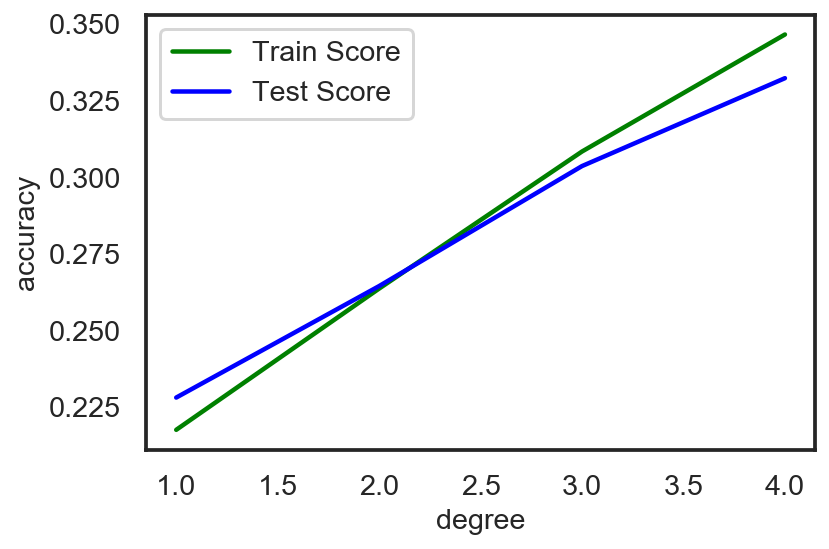

In [302]:
%matplotlib inline

x_axis = range(1,5)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

Degree=3 is to build model with best parameters

In [303]:
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_pca_train)
X_test_poly = poly.transform(X_pca_test)
lin_mod.fit(X_train_poly, y_pca_train)
y_pr= lin_mod.predict(X_test_poly)
y_pr
print("Train Score: {:.4f}".format(lin_mod.score(X_train_poly, y_pca_train)*100))
print("Test Score: {:.4f}".format(lin_mod.score(X_test_poly, y_pca_test)*100))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pca_test, y_pr)))

Train Score: 30.8523
Test Score: 30.3771
RMSE: 125.90033630337766


In [304]:
report_table = report_table + [['Polynomial Regressor', 'degree = 3', lin_mod.score(X_train_poly, y_pca_train)*100, lin_mod.score(X_test_poly, y_pca_test)*100]]

# Kernalised SVR with PCA

SVR Linear

In [228]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

param_grid  = {"C": [ 0.001, 0.01, 0.1, 1, 10, 100], 
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100] }

svm_lin = SVR(kernel='linear')
grid_svl = GridSearchCV(estimator = svm_lin, param_grid = param_grid, return_train_score = True, cv = 10, scoring = 'r2', n_jobs=-1)
grid_svl.fit(X_pca_train, y_pca_train)
print(grid_svl.best_score_)
print(grid_svl.best_params_)

0.176131969432876
{'C': 100, 'gamma': 0.001}


In [229]:
clf1 = SVR(kernel ='linear', gamma = 0.001, C = 100).fit(X_pca_train, y_pca_train)

In [230]:
print("Train Score: {:.4f}".format(clf1.score(X_pca_train, y_pca_train)*100))
print("Test Score: {:.4f}".format(clf1.score(X_pca_test, y_pca_test)*100))

Train Score: 17.7764
Test Score: 19.0631


In [305]:
report_table = report_table + [['SVR Linear Regressor', 'C = 100, gamma = 0.001', clf1.score(X_pca_train, y_pca_train)*100, clf1.score(X_pca_test, y_pca_test)*100]]


SVR Rbf

In [231]:
from sklearn.svm import SVR
param_grid = {"C": [0.001, 0.01, 0.1, 1], "gamma":[0.001, 0.01, 0.1, 1]}

## Define the SVM model
svm_reg = SVR(kernel='rbf') 

## Perform the grid search over the parameters

grid_svrk = GridSearchCV(estimator = svm_reg, param_grid = param_grid, cv = 10, scoring = 'r2', n_jobs=-1)
grid_svrk.fit(X_pca_train, y_pca_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [232]:
print(grid_svrk.best_score_)
print(grid_svrk.best_params_)

0.17344213747173187
{'C': 1, 'gamma': 0.1}


In [233]:
clf2 = SVR(kernel ='rbf', gamma = 0.1, C = 1).fit(X_pca_train, y_pca_train)

In [234]:
print("Train Score: {:.4f}".format(clf2.score(X_pca_train, y_pca_train)*100))
print("Test Score: {:.4f}".format(clf2.score(X_pca_test, y_pca_test)*100))

Train Score: 18.0056
Test Score: 18.8562


In [306]:
report_table = report_table + [['SVR Kernel (rbf) Regressor', 'C = 1, gamma = 0.1', clf2.score(X_pca_train, y_pca_train)*100, clf2.score(X_pca_test, y_pca_test)*100]]


SVR Poly

In [237]:
from sklearn.svm import SVR
param_grid = {"C": [0.001, 0.01, 0.1, 1], "gamma":[0.001, 0.01, 0.1, 1], 'degree':[2,3,4]}

## Define the SVM model
svm_reg = SVR(kernel='poly') 

## Perform the grid search over the parameters

grid_svrk = GridSearchCV(estimator = svm_reg, param_grid = param_grid, cv = 10, scoring = 'r2', n_jobs=-1)
grid_svrk.fit(X_pca_train, y_pca_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'degree': [2, 3, 4],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [238]:
print(grid_svrk.best_score_)
print(grid_svrk.best_params_)

0.21375070118634423
{'C': 0.1, 'degree': 3, 'gamma': 1}


In [239]:
clf3 = SVR(kernel ='poly', degree = 3, gamma = 1, C = 0.1).fit(X_pca_train, y_pca_train)

In [240]:
print("Train Score: {:.4f}".format(clf3.score(X_pca_train, y_pca_train)*100))
print("Test Score: {:.4f}".format(clf3.score(X_pca_test, y_pca_test)*100))

Train Score: 22.0577
Test Score: 21.7340


In [307]:
report_table = report_table + [['SVR Kernel (poly) Regressor', 'C = 0.1, degree = 3, gamma = 1', clf3.score(X_pca_train, y_pca_train)*100, clf3.score(X_pca_test, y_pca_test)*100]]


# Project 2 Report

In [308]:
report = pd.DataFrame(report_table,columns = ['Model name','Model parameter', 'Train accuracy %', 'Test accuracy %'])
report.index = report['Model name']
report

,Model name,Model parameter,Train accuracy %,Test accuracy %
Model name,,,,
Ridge,Ridge,alpha = 0.02,21.769758,22.822277
LASSO Regressor,LASSO Regressor,alpha = 0.02,21.769750,22.821351
KNN Regressor,KNN Regressor,k = 5,52.767393,32.137767
Linear Regressor,Linear Regressor,,21.769758,22.822279
Polynomial Regressor,Polynomial Regressor,degree = 3,30.852251,30.377051
SVR Linear Regressor,SVR Linear Regressor,"C = 100, gamma = 0.001",17.776390,19.063103
SVR Kernel (rbf) Regressor,SVR Kernel (rbf) Regressor,"C = 1, gamma = 0.1",18.005644,18.856165
SVR Kernel (poly) Regressor,SVR Kernel (poly) Regressor,"C = 0.1, degree = 3, gamma = 1",22.057729,21.734036


# Project 1 report

In [270]:
report = []
report += [["Ridge Regressor", '67.806', '58.59', 'alpha = 100']]
report += [["Lasso Regressor",'65.101', '54.77', 'alpha = 1']]
report += [["Knn Regressor",'78.06', '54.83', 'n=5']] 
report += [["Polynomial Regressor",'67.57', '60.80']] 
report += [["Linear Regressor",'68.104', '61.27']]
report += [["SVR Linear Regressor",'64.91', '53.17', 'C = 1, gamma = 0.001']]
report += [["SVR Poly Regressor",'8.37', '-21.86']]
report += [["SVR rbf Regressor",'22.15', '-.94']]


In [271]:
reporta = pd.DataFrame(report,columns = ['Model name', 'Train accuracy %', 'Test accuracy %', 'Model parameter'])
reporta.index = reporta['Model name']
reporta

,Model name,Train accuracy %,Test accuracy %,Model parameter
Model name,,,,
Ridge Regressor,Ridge Regressor,67.806,58.59,alpha = 100
Lasso Regressor,Lasso Regressor,65.101,54.77,alpha = 1
Knn Regressor,Knn Regressor,78.06,54.83,n=5
Polynomial Regressor,Polynomial Regressor,67.57,60.80,None
Linear Regressor,Linear Regressor,68.104,61.27,None
SVR Linear Regressor,SVR Linear Regressor,64.91,53.17,"C = 1, gamma = 0.001"
SVR Poly Regressor,SVR Poly Regressor,8.37,-21.86,None
SVR rbf Regressor,SVR rbf Regressor,22.15,-.94,None


Generally it is the case that pca makes the model accuracy better than when they are run individually. However, in this case the dataset doesnt seem to be suitable fot PCA application. However, PCA has been helpful in reducing the number of features and the computational power of the algorithms. Accuracy doesnt seem to be improved as but in the case of SVR models which were resulting in negative accuracy in project 1 have turned out to better with PCA. 

# Neural Network Model for Regression

In [47]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.
C:\Users\kanav\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kanav\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kanav\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kanav\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [48]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [54]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(20, input_dim=117, activation='relu'))   #input layer
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))    #Output layer
    
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [55]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[20,40,60,80,100,120] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5, n_jobs = -1, verbose= True)

grid_search_result = grid_search.fit(X_train_org, y_train_org)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.3min
C:\Users\kanav\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  7.2min finished
W1130 17:33:34.564514 41920 deprecation.py:323] From C:\Users\kanav\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Best parameters: {'batch_size': 60, 'epochs': 10}
Best cross-validation score: 0.02


In [58]:
#Step1: Build the model
model = Sequential()

#input layer
model.add(Dense(1, input_dim = 117, activation = 'relu'))

#Step2: Build the computational graph
model.compile(loss = 'mse', optimizer = 'sgd', metrics = ['mse'])

#model.compile(loss = 'mse', optimizer = 'sgd', metrics = ['mse'])

#Step3: Train teh model
model.fit(X_train_org, y_train_org, batch_size = 60 , epochs = 10)

Epoch 1/10
12000/12000 [==============================] - 0s 33us/step - loss: 15444.5817 - mean_squared_error: 15444.5817
Epoch 2/10
12000/12000 [==============================] - 0s 19us/step - loss: 10929.2824 - mean_squared_error: 10929.2824
Epoch 3/10
12000/12000 [==============================] - 0s 14us/step - loss: 9226.8170 - mean_squared_error: 9226.8170
Epoch 4/10
12000/12000 [==============================] - 0s 15us/step - loss: 8326.7048 - mean_squared_error: 8326.7048
Epoch 5/10
12000/12000 [==============================] - 0s 17us/step - loss: 7703.1194 - mean_squared_error: 7703.1194
Epoch 6/10
12000/12000 [==============================] - 0s 17us/step - loss: 7362.2818 - mean_squared_error: 7362.2818
Epoch 7/10
12000/12000 [==============================] - 0s 21us/step - loss: 7108.4997 - mean_squared_error: 7108.4997
Epoch 8/10
12000/12000 [==============================] - 0s 21us/step - loss: 6976.6493 - mean_squared_error: 6976.6493
Epoch 9/10
12000/12000 [====

In [59]:
model.evaluate(X_train_org, y_train_org)

12000/12000 [==============================] - 0s 17us/step


[6672.462947916667, 6672.462947916667]

In [60]:
model.evaluate(X_test_org, y_test_org)

5373/5373 [==============================] - 0s 13us/step


[18766.143251885875, 18766.143251885875]

In [61]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train_org)
y_test_predict = model.predict(X_test_org)

print('Train score: {:.2f}'.format(r2_score(y_train_org, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test_org, y_test_predict)))

Train score: 0.71
Test score: 0.61
